# 2015 Yellow Taxi Trip Data

In [175]:
#load libraries
import pandas as pd
import numpy as np
import json
import requests 
import os
import sys
import matplotlib.pyplot as plt
from sodapy import Socrata

#declare parameters
url="https://data.cityofnewyork.us/resource/2yzn-sicd.json"
%matplotlib inline

#declare environmental variable
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#create function to load a json file to pandas and creates a local copy if it hasn't been made
def json_to_pandas(url,path):
    #declare parameters
    name = url.split('/')[-1].replace(".json",".csv")
    filename=path+"/"+name
    #checks if local file exists
    if os.path.isfile(filename)==True:
        #loads from existing csv file and returns a pandas dataframe
        print('File exists, Please proceed to the next step')
        return pd.read_csv(filename,encoding='utf-8') 
    else:
        try:
            #json=pd.read_json(json_file,orient=)
            #js_file=pd.read_json(url)
            client = Socrata("data.cityofnewyork.us", None)
            results = client.get("2yzn-sicd",limit=50000)
            js_file = pd.DataFrame.from_records(results)
            try:
                print('exporting json to {}'.format(filename))
                js_file.to_csv(filename,header=True, index=False, encoding='utf-8')
                print('successfully downloaded into pandas dataframe and exported to csv')
            except:
                print("Pandas has encountered an error with exporting to csv")
            finally:
                return js_file
        except:
            print("Pandas has encountered an error with reading the json file")

# Load data

In [270]:
#checks if taxi data is already in the local directory, PUIData and loads it.
#Otherwise it downloads the json file and creates a local copy
taxi_data=json_to_pandas(url,puidata)

#returns number of rows in file
print("Number of rows included in the dataset " + str(len(taxi_data)) + ".")

File exists, Please proceed to the next step
Number of rows included in the dataset 50000.


# Show the first eight rows of the dataset

In [271]:
taxi_data.head(8)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-08-17T21:52:55.000,40.780674,-73.949974,0.5,14.0,0.3,0.5,1,1,2015-08-17T21:37:52.000,40.750137,-73.987946,1,N,2.0,0.0,17.3,3.53,2
1,2015-08-27T14:51:26.000,40.710724,-74.011368,0.0,8.5,0.3,0.5,6,1,2015-08-27T14:40:55.000,40.719639,-73.994286,1,N,1.0,0.0,10.3,1.50,2
2,2015-08-13T14:43:00.000,40.764400,-73.995758,0.0,9.5,0.3,0.5,1,1,2015-08-13T14:29:52.000,40.763165,-73.981766,1,N,1.0,0.0,11.3,0.90,1
3,2015-08-17T06:17:48.000,40.683971,-73.950912,0.0,11.0,0.3,0.5,1,2,2015-08-17T06:07:50.000,40.687317,-73.990067,1,N,0.0,0.0,11.8,2.71,2
4,2015-08-28T20:17:06.000,40.727905,-73.988266,0.5,8.0,0.3,0.5,2,2,2015-08-28T20:07:06.000,40.738518,-73.999794,1,N,0.0,0.0,9.3,1.10,1
5,2015-08-23T22:49:31.000,40.766010,-73.981567,0.5,7.0,0.3,0.5,1,2,2015-08-23T22:42:28.000,40.753330,-73.978737,1,N,0.0,0.0,8.3,1.26,2
6,2015-08-28T06:42:21.000,40.756489,-73.976059,0.0,4.0,0.3,0.5,1,1,2015-08-28T06:39:08.000,40.759537,-73.984612,1,N,4.8,0.0,9.6,0.50,1
7,2015-08-15T21:40:03.000,40.778088,-73.974686,0.5,5.5,0.3,0.5,1,1,2015-08-15T21:34:31.000,40.780991,-73.981499,1,N,1.7,0.0,8.5,0.60,1


# Reduce the dataset to datetime and two numerical columns

In [272]:
drop_cols=[x for x in taxi_data.columns.get_values() if x not in ['pickup_datetime','tip_amount']]
taxi_data.drop(drop_cols,axis=1,inplace=True)

# Show eight seven rows of reduced dataset

In [273]:
taxi_data.head(7)

,pickup_datetime,tip_amount
0,2015-08-17T21:37:52.000,2.0
1,2015-08-27T14:40:55.000,1.0
2,2015-08-13T14:29:52.000,1.0
3,2015-08-17T06:07:50.000,0.0
4,2015-08-28T20:07:06.000,0.0
5,2015-08-23T22:42:28.000,0.0
6,2015-08-28T06:39:08.000,4.8


In [274]:
taxi_data['pickup_date']=pd.to_datetime(taxi_data['pickup_datetime']).apply(lambda x: x.date())

In [275]:
taxi_data.drop('pickup_datetime',axis=1,inplace=True)
taxi_data.head(8)

,tip_amount,pickup_date
0,2.0,2015-08-17
1,1.0,2015-08-27
2,1.0,2015-08-13
3,0.0,2015-08-17
4,0.0,2015-08-28
5,0.0,2015-08-23
6,4.8,2015-08-28
7,1.7,2015-08-15


# Plot the passenger count and tip amount across pickup date

In [276]:
#fix object types
taxi_data['tip_amount']=taxi_data['tip_amount'].astype(float)
#taxi_data['pickup_date']=taxi_data['pickup_date'].astype('datetime64[ns]')
taxi_data.dtypes

tip_amount     float64
pickup_date     object
dtype: object

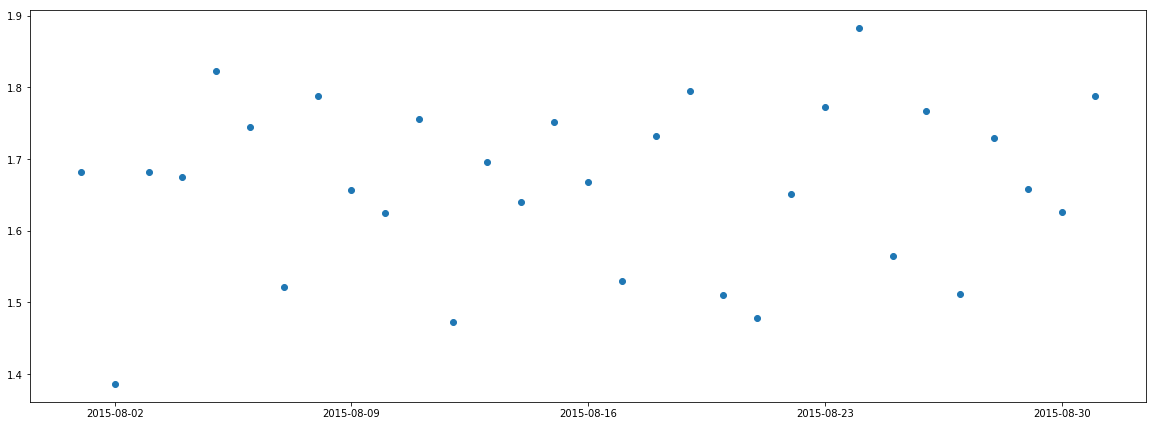

In [284]:
plt.figure(figsize=(20,8))
plt.gcf().autofmt_xdate()
plt.plot(taxi_data.pickup_date.unique()
         ,taxi_data.groupby(['pickup_date'], sort=True)['tip_amount'].mean(),'o')
plt.show()